In [97]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#Lib cuz the data are sound waves
import os
import librosa
import librosa.display
import glob 
import skimage
import IPython.display as ipd
from IPython.core.display import display


/tmp/ipykernel_34579/3160913366.py:26: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [98]:
dataset = pd.read_csv("Data_Challenge_3/participant_urbansound8k.csv")
dataset

,slice_file_name,ID,fold,Label
0,100032-3-0-0.wav,100032-3-0-0,5,False
1,100263-2-0-117.wav,100263-2-0-117,5,False
2,100263-2-0-121.wav,100263-2-0-121,5,False
3,100263-2-0-126.wav,100263-2-0-126,5,False
4,100263-2-0-137.wav,100263-2-0-137,5,False
...,...,...,...,...
10380,312731-4-3-8.wav,312731-4-3-8,12,NaN
10381,388698-9-5-8.wav,388698-9-5-8,12,NaN
10382,360725-1-6-7.wav,360725-1-6-7,12,NaN
10383,392825-0-7-8.wav,392825-0-7-8,12,NaN


In [99]:
#dataset.isnull().sum()
df_train = dataset.dropna()
df_train

,slice_file_name,ID,fold,Label
0,100032-3-0-0.wav,100032-3-0-0,5,False
1,100263-2-0-117.wav,100263-2-0-117,5,False
2,100263-2-0-121.wav,100263-2-0-121,5,False
3,100263-2-0-126.wav,100263-2-0-126,5,False
4,100263-2-0-137.wav,100263-2-0-137,5,False
...,...,...,...,...
7074,99812-1-2-0.wav,99812-1-2-0,7,False
7075,99812-1-3-0.wav,99812-1-3-0,7,False
7076,99812-1-4-0.wav,99812-1-4-0,7,False
7077,99812-1-5-0.wav,99812-1-5-0,7,False


Visualization of the of a .wav file whom is a gunshot

In [100]:
fill_data[fill_data["Label"]==True]

,slice_file_name,ID,fold,Label
60,102305-6-0-0.wav,102305-6-0-0,1,True
450,110622-6-0-0.wav,110622-6-0-0,3,True
465,111048-6-0-0.wav,111048-6-0-0,6,True
771,122690-6-0-0.wav,122690-6-0-0,1,True
1017,131571-6-0-0.wav,131571-6-0-0,8,True
...,...,...,...,...
6519,77247-6-0-0.wav,77247-6-0-0,5,True
6623,78776-6-0-0.wav,78776-6-0-0,3,True
6709,84254-6-0-0.wav,84254-6-0-0,5,True
6752,86278-6-0-0.wav,86278-6-0-0,1,True


In [101]:
path_gunshot1 = './Data_Challenge_3/fold1/102305-6-0-0.wav'
data1, source1 = librosa.load(path_gunshot1)
data1

array([2.0211954e-05, 5.0024112e-04, 1.0159623e-03, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

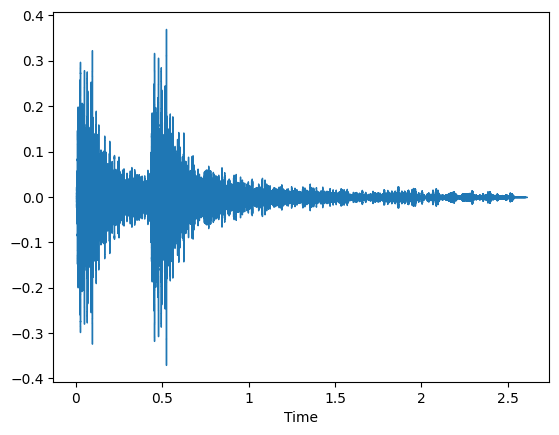

In [102]:
librosa.display.waveshow(data1)
def beep():
    display(ipd.Audio(path_gunshot1))
beep()


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

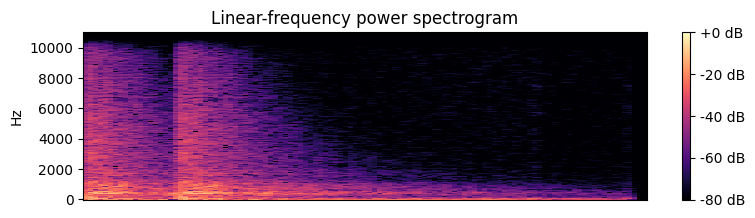

In [103]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Visualization of the of a .wav file whom is NOT a gunshot

In [104]:
df_train[df_train["Label"]==False]


,slice_file_name,ID,fold,Label
0,100032-3-0-0.wav,100032-3-0-0,5,False
1,100263-2-0-117.wav,100263-2-0-117,5,False
2,100263-2-0-121.wav,100263-2-0-121,5,False
3,100263-2-0-126.wav,100263-2-0-126,5,False
4,100263-2-0-137.wav,100263-2-0-137,5,False
...,...,...,...,...
7074,99812-1-2-0.wav,99812-1-2-0,7,False
7075,99812-1-3-0.wav,99812-1-3-0,7,False
7076,99812-1-4-0.wav,99812-1-4-0,7,False
7077,99812-1-5-0.wav,99812-1-5-0,7,False


In [105]:
path_no_gunshot2 = './Data_Challenge_3/fold5/100032-3-0-0.wav'
data2, source2 = librosa.load(path_no_gunshot2)
data2

array([-0.00341243, -0.00506065, -0.00463294, ..., -0.00247565,
       -0.00155365, -0.00035246], dtype=float32)

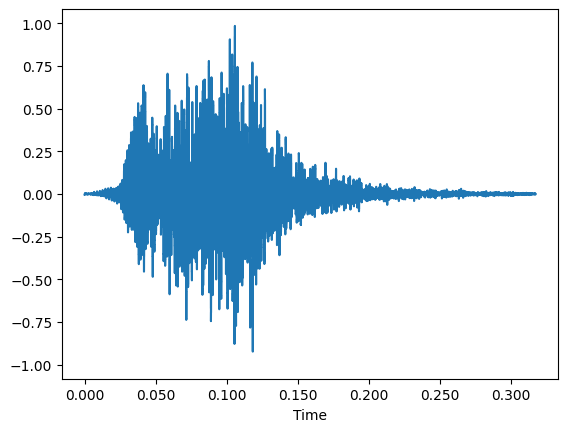

In [106]:
librosa.display.waveshow(data2)
#ipd.Audio(path_no_gunshot2)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

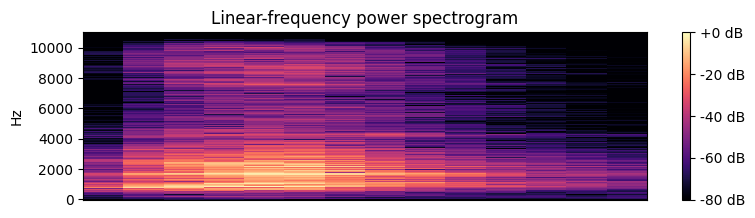

In [107]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [108]:
arr1 = librosa.feature.mfcc(y=data1, sr=source1)
arr1.shape

(20, 113)

In [109]:
arr2 = librosa.feature.mfcc(y=data2, sr=source2)
arr2.shape

(20, 14)

We can see that some audio files have different lengths. We will need to pad them to the same length.

In [112]:
from tqdm import tqdm

feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in tqdm(dataset.index):
        file_name = './Data_Challenge_3/fold' + str(dataset["fold"][i]) + '/' + dataset["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate),axis=1)   
        feature.append(mels)
        label.append(int(0)) if dataset["Label"][i] == True else label.append(int(1))
    return [feature, label]


In [113]:
temp = parser(df_train)

 27%|██▋       | 2830/10385 [06:06<16:12,  7.77it/s]/usr/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
 65%|██████▌   | 6755/10385 [14:56<06:28,  9.34it/s]/usr/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/usr/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
100%|██████████| 10385/10385 [20:21<00:00,  8.50it/s]


In [115]:
temp = np.array(temp)
data = temp.transpose()

In [116]:
X_ = data[:, 0].copy()
Y_ = data[:, 1].copy()
print(X_.shape, Y_.shape)

(10385,) (10385,)


In [117]:
X = np.ones((len(df_train), len(X_[0])))
Y = np.empty([len(df_train)])

In [118]:
for i in range(len(df_train)):
    Y[i] = int(Y_[i])
    X[i] = (X_[i])

In [119]:
print(X.shape)
print(Y.shape)

(7079, 20)
(7079,)


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score,confusion_matrix, precision_score, recall_score


clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', class_weight="balanced"),
)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.97732135216089

In [124]:
Y_test_pred = clf.predict(X_test)

In [125]:
# print results
print(f'Test f1-score macro : ',f1_score(Y_test, Y_test_pred, average="macro"))
print(f'Test precision-score macro : ',precision_score(Y_test, Y_test_pred, average="macro"))
print(f'Test recall-score macro : ',recall_score(Y_test, Y_test_pred, average="macro"))
print(f'Test roc-score macro : ',roc_auc_score(Y_test, Y_test_pred))
print(f'Test confusion matrix : ',confusion_matrix(Y_test, Y_test_pred))

Test f1-score macro :  0.8802989698990966
Test precision-score macro :  0.8337782264347803
Test recall-score macro :  0.9447152490047932
Test roc-score macro :  0.9447152490047932
Test confusion matrix :  [[  90    9]
 [  44 2194]]


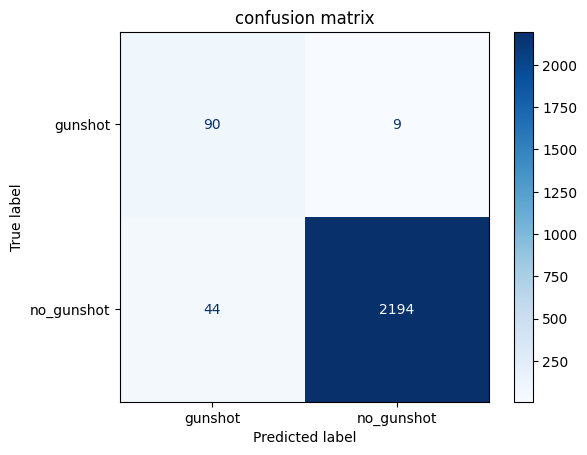

<Figure size 2000x2000 with 0 Axes>

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ["gunshot","no_gunshot"]

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title("confusion matrix")


plt.figure(figsize=(20,20))

plt.show()

https://www.kaggle.com/code/prabhavsingh/urbansound8k-classification/notebook
